# FEATURE ENGINEERING & DATA PRE-PROCESSING

In [107]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [108]:
# Pandas View Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
pd.set_option('display.width', 500)

In [109]:
## Load Datasets
def load_dataset(data_url='C:/Users/Hp/Desktop/Data_Science/Feature_Engineering/datasets/titanic.csv'):
    data =pd.read_csv(data_url)
    return data

In [110]:
df = load_dataset()

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


## Outliers

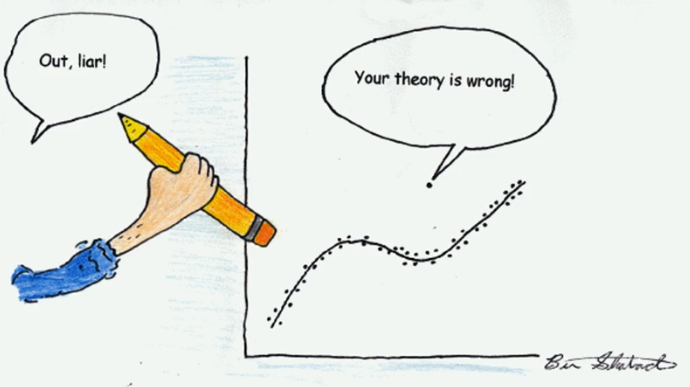

**Step 1**

- 1.Investigate Threshold
- 2.Find Outliers
- 3.Graph Technique



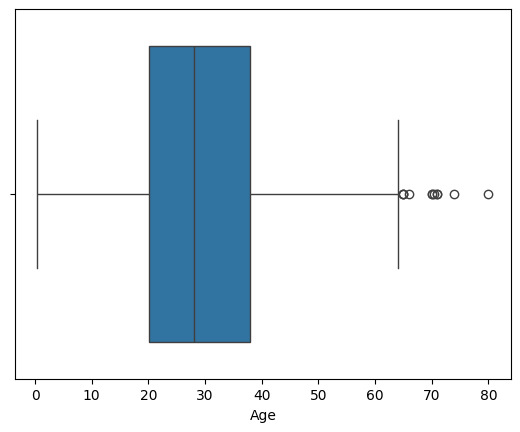

In [112]:
# Outlier with boxplot

sns.boxplot(x=df["Age"])
plt.show()

How can ı investigate outliers on the graph?
- 1. Find Threshold

In [113]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
print(f"25th percentile = {q1} & 75th percentile = {q3}")

25th percentile = 20.125 & 75th percentile = 38.0


In [114]:
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr
print(f'lower limit = {low}\nupper limit = {up} ')

lower limit = -6.6875
upper limit = 64.8125 


In [115]:
#Final Threshold Analysis in outliers
df[(df["Age"] < low) | (df["Age"] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [116]:
# Quick Question for outliers
df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)

True

### Function

In [117]:
# Find outlier thresholds
# q1 and q3 values could change (5-95 or 1-99)
# The instructor prefers 5-95 but in lit. it is 25-75

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [118]:
#low_limit, up_limit
outlier_thresholds(df,'Age')

(-6.6875, 64.8125)

In [119]:
outlier_thresholds(df,'Fare')

(-26.724, 65.6344)

In [120]:
low, up = outlier_thresholds(df,'Fare')
df.query('Fare > @up | Fare < @low')['Fare'].describe()

count   116.000
mean    128.292
std      84.637
min      66.600
25%      78.190
50%      90.000
75%     147.778
max     512.329
Name: Fare, dtype: float64

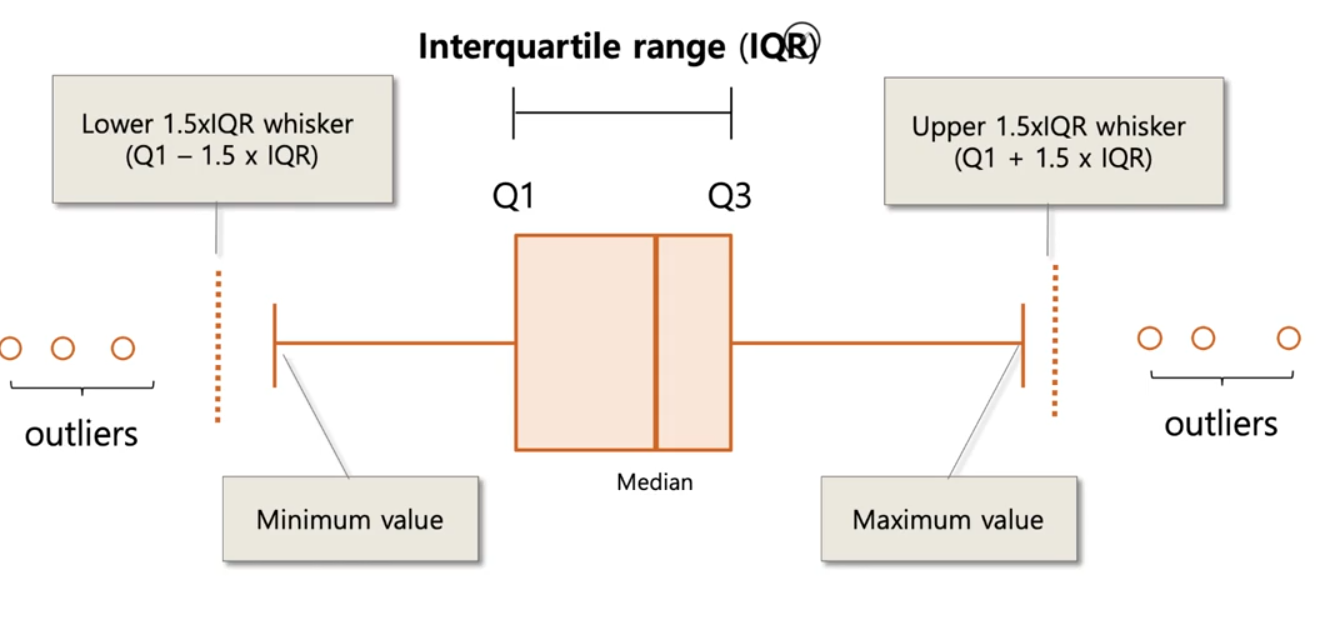

#### Convert Categoric Data types to Numeric

Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
   - Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.


 Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

Notes

- cat_cols + num_cols + cat_but_car = toplam değişken sayısı
- num_but_cat cat_cols'un içerisinde.
- Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı


In [121]:
#threshold can be changed. It ıs super function.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                    dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

     # Getting the all look like numerical variables
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    #Getting the actual numerical variables by substracting numeric categorical variables
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [122]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [123]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [124]:
num_cols

['PassengerId', 'Age', 'Fare']

In [125]:
# Redefining num_col here
num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)

['Age', 'Fare']


In [126]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [127]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


#### Aykırı Değerler Nasıl Yakalanır?

In [128]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [129]:
df[(df["Age"] < low) | (df["Age"] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [130]:
# Aykırı Değer Var mı Yok mu?
df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)


True

In [131]:
df[(df["Age"] < low)].any(axis=None)

False

In [132]:
# Aykırı Değerlerin Kendilerine Erişmek
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


In [133]:
grab_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [134]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [135]:
print(outlier_thresholds(df, "Age"))
print(check_outlier(df, "Age"))


(-6.6875, 64.8125)
True


In [136]:
print(grab_outliers(df, "Age", True)) #True index'i verir

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q
Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


### Aykırı Değer Problemlerini Çözme

#### 1.Silme

In [137]:
low, up = outlier_thresholds(df, "Fare")
df.shape

(891, 12)

In [138]:
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape

(775, 12)

In [139]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [140]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [141]:
for col in num_cols:
    new_df = remove_outlier(df, col)

In [142]:
df.shape[0] - new_df.shape[0]

116

#### 2. Baskılama Yöntemi (re-assignment with thresholds)

In [143]:
low, up = outlier_thresholds(df, "Fare")

In [144]:
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [145]:
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [146]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [147]:
df.shape

(891, 12)

In [148]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [149]:
for col in num_cols:
    replace_with_thresholds(df, col)  #Threshold replace yaptık. ve artık outlier false çıktı

In [150]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


## Recap

In [169]:
df = load_dataset()
#1. Aykırı değer saptama
outlier_thresholds(df, "Age")


(-6.6875, 64.8125)

In [170]:
df.shape

(891, 12)

In [171]:
#2. Aykırı değer var mı yok mu
check_outlier(df, "Age")


True

In [172]:
#3.outlierları bize getir.
grab_outliers(df, "Age", index=True)


     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [175]:
#4.Outliarları silerek veriyi düzeltelim.( başka seçenekler de kullanılabilirdi)

remove_outlier(df, "Age").shape


(880, 12)

In [177]:
#5.Baskılama yöntemi kullan 

replace_with_thresholds(df, "Age")


In [106]:
#6. Final Check
check_outlier(df, "Age")

False

### Çok Değişkenli Aykırı Değer Analizi : Local Outlier Factor

Değişken 1 : Yaş           =17
Değişken 2: Evlilik Sayısı =3

17 yaşındayken 3 kere evlenme durumunu ele alalım. Buradada gördüğümüz gibi  eğer 2 değişken birlikte aykırı değer veriyorsa bu durumdan bahsederiz.

#### LOF (Local Outlier Factor)

The local outlier factor of a data object p is calculated as the ratio of its local density and those of its k-nearest neighbors.

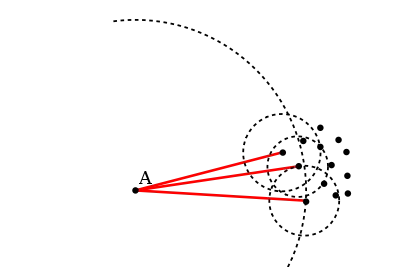
outlier

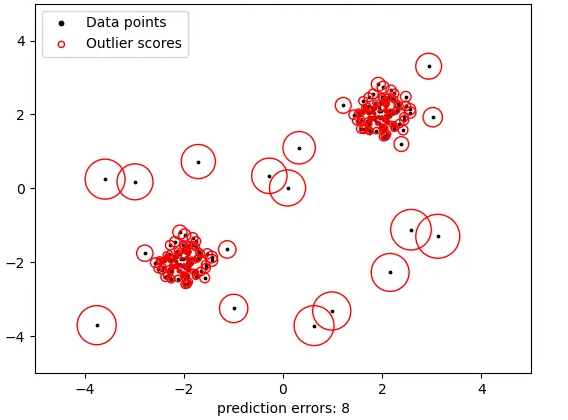

In [187]:
df = sns.load_dataset('diamonds')

In [188]:
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()
df.shape

(1114, 7)

In [189]:
for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [190]:
low, up = outlier_thresholds(df, "carat")

In [191]:
df[((df["carat"] < low) | (df["carat"] > up))].shape

(283, 7)

In [184]:
low, up = outlier_thresholds(df, "depth")

In [193]:
df[((df["depth"] < low) | (df["depth"] > up))].shape

(1114, 7)

In [194]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [195]:
df_scores = clf.negative_outlier_factor_
df_scores[0:5]

array([-1.25828131, -1.26933664, -1.29331959, -1.05525469, -1.03691404])

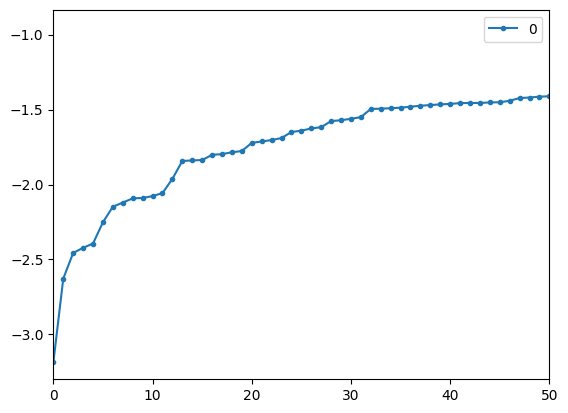

In [196]:
# Elbow yöntemi ile belirleme
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

# En marjinal ( eğim  büyüklüğü arttıkça) değişiklik nerede ise orayı eşik değeri olarak belirleyebilirim.(12-13)

In [199]:
# Outliers'da Eşik değer belirleme 
th = np.sort(df_scores)[5] #5.index değerine bakalım
th

-2.2514822863241433

In [200]:
df[df_scores < th]

,carat,depth,table,price,x,y,z
91,0.860,55.100,69.000,2757.000,6.450,6.330,3.520
314,0.760,59.000,70.000,2800.000,5.890,5.800,3.460
359,0.740,61.100,68.000,2805.000,5.820,5.750,3.530
712,0.980,53.300,67.000,2855.000,6.820,6.740,3.610
777,0.750,55.800,70.000,2859.000,6.090,5.980,3.370


Neden aykırılar acaba?